In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns 
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
training = pd.read_csv('/kaggle/input/titanic/train.csv')
test = pd.read_csv('/kaggle/input/titanic/test.csv')

training['train_test'] = 1
test['train_test'] = 0
test['Survived'] = np.NaN
all_data = pd.concat([training,test])

%matplotlib inline
all_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'train_test'],
      dtype='object')

#project outline

**Data Exploration**

Here we explore the data, using pivot tables and barplots/histograms to allow us to visualise the dataset more clearly. Further investigation would then allow us to do some feature engineering to better equip ourselves in creating a suitable model for the training dataset, which we will then use on the test set.

Firstly, we note that some of the column names are not clear, and hence provide the below clarification:

- Survived - Survival (0 = No; 1 = Yes)
- Pclass - Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
- Sibsp - Number of Siblings/Spouses Aboard
- Parch - Number of Parents/Children Aboard
- Ticket - Ticket Number
- Embarked - Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)


In [3]:
training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  train_test   891 non-null    int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 90.6+ KB


In [4]:
training.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,train_test
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.0
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,1.0
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,0.0
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,1.0
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,1.0
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,1.0
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,1.0
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.0


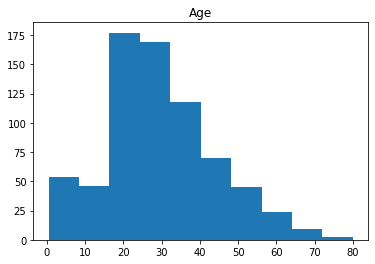

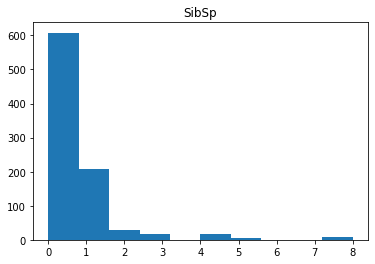

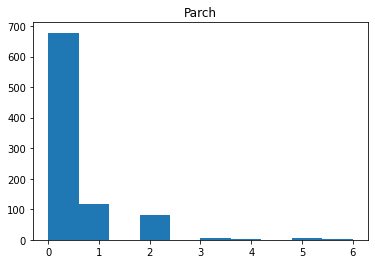

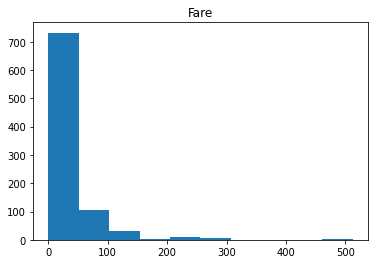

In [5]:
# training.columns
# we note that we can split the data into numerical and categorical variables.
# this is important for visualisation as we want to visualise them with separate methods.
training_numerical = training[['Age', 'SibSp','Parch', 'Fare']]
# categorical data: ['Survived','Pclass','Sex','Embarked', 'Ticket', 'Cabin']

for i in training_numerical.columns:
    plt.hist(training_numerical[i])
    plt.title(i)
    plt.show()

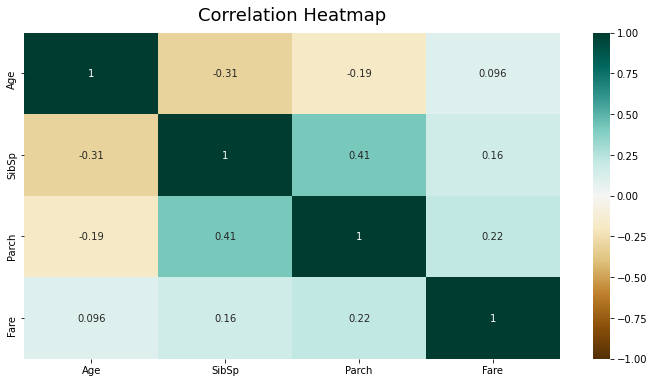

In [6]:
plt.figure(figsize=(12, 6))
heatmap = sns.heatmap(training_numerical.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);

In [7]:
under_10 = training[training['Age'] < 10]
under_10.groupby([ 'Parch', 'Survived']).size()

#training[(training['Age'] < 10) & (training['Parch'] == 0)]

Parch  Survived
0      1            1
1      0           12
       1           23
2      0           12
       1           14
dtype: int64

In [8]:
pd.pivot_table(training, index = 'Survived', values = ['Age','SibSp','Parch','Fare'])

,Age,Fare,Parch,SibSp
Survived,,,,
0,30.626179,22.117887,0.329690,0.553734
1,28.343690,48.395408,0.464912,0.473684


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:ylabel='Survived'>

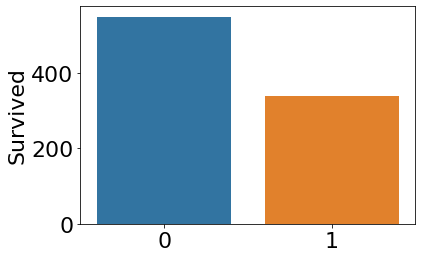

In [37]:
plt.rcParams['font.size'] = 22
sns.barplot(training['Survived'].value_counts().index, training['Survived'].value_counts())

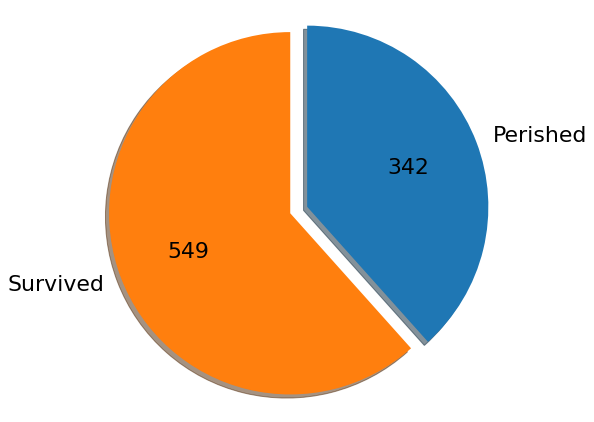

In [39]:
labels = ['Survived', 'Perished']
sizes = [549, 342]
explode = (0, 0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')

#fig1, ax1 = plt.subplots()
plt.figure(figsize=(10, 7.5))
colours = {'Survived': 'C1',
           'Perished': 'C0'}
# absolute_value
# autopct = '%1.1f%%' 
def autopct_format(values):
    def my_format(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{v:d}'.format(v=val)
    return my_format

plt.pie(sizes, explode=explode, labels=labels, autopct = autopct_format(sizes),
        shadow=True, startangle=90, colors=[colours[key] for key in labels])
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [10]:
training['Survived'].value_counts().index, training['Survived'].value_counts()

(Int64Index([0, 1], dtype='int64'),
 0    549
 1    342
 Name: Survived, dtype: int64)

In [11]:
age_chart = training[['Survived', 'Age']]



conditions = [
    (age_chart['Age'] <= 20),
    (age_chart['Age'] > 20) & (age_chart['Age'] <= 40),
    (age_chart['Age'] > 40) & (age_chart['Age'] <= 60),    
    (age_chart['Age'] > 60)]
choices = ['<21', '21-40', '41-60', '>60']
age_chart['age_bucket'] = np.select(conditions, choices)
age_chart = age_chart[['Survived', 'age_bucket']]
age_chart.head()
age_chart.groupby(['age_bucket', 'Survived'])['Survived'].count()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


age_bucket  Survived
0           0           125
            1            52
21-40       0           232
            1           153
41-60       0            78
            1            50
<21         0            97
            1            82
>60         0            17
            1             5
Name: Survived, dtype: int64

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Age')

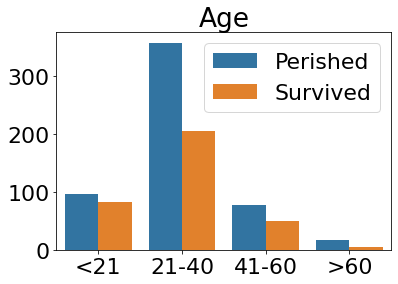

In [38]:
bucket_value = [97, 82, 357, 204, 78, 50, 17, 4]
buckets = ['<21', '<21', '21-40', '21-40', '41-60', '41-60', '>60', '>60']
Survived = ['Perished', 'Survived', 'Perished', 'Survived', 'Perished', 'Survived', 'Perished', 'Survived']
sns.barplot(buckets, bucket_value, hue = Survived).set_title('Age')

In [14]:
training['Age'].value_counts().index, training['Age'].value_counts()

(Float64Index([24.0, 22.0, 18.0, 28.0, 19.0, 30.0, 21.0, 25.0, 36.0, 29.0, 35.0,
               32.0, 27.0, 26.0, 16.0, 31.0, 33.0, 34.0, 23.0, 20.0, 39.0, 42.0,
               40.0, 17.0, 45.0, 38.0,  4.0,  2.0, 50.0, 47.0, 48.0, 44.0,  9.0,
               54.0, 51.0,  1.0, 14.0,  3.0, 41.0, 37.0, 52.0, 49.0, 15.0, 43.0,
               58.0,  8.0, 60.0, 11.0, 56.0,  5.0, 62.0, 65.0,  7.0, 61.0, 46.0,
                6.0, 40.5, 10.0, 0.75, 30.5, 64.0, 32.5, 0.83, 59.0, 70.0, 63.0,
               28.5, 71.0, 13.0, 57.0, 55.0, 45.5, 24.5, 66.0, 20.5, 0.67, 80.0,
               14.5, 34.5, 23.5, 53.0, 36.5, 0.42, 55.5, 74.0, 0.92, 70.5,
               12.0],
              dtype='float64'),
 24.00    30
 22.00    27
 18.00    26
 28.00    25
 19.00    25
          ..
 55.50     1
 74.00     1
 0.92      1
 70.50     1
 12.00     1
 Name: Age, Length: 88, dtype: int64)

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Pclass  Survived
1       0            80
        1           136
2       0            97
        1            87
3       0           372
        1           119
dtype: int64

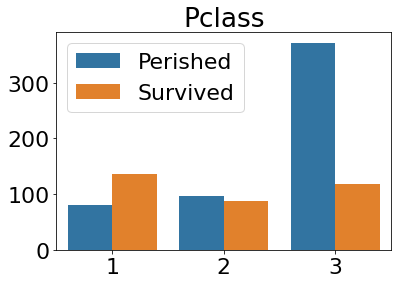

In [15]:
Pclass_y = []
Pclass_x = [1,1,2,2,3,3]
Survived = ['Perished', 'Survived','Perished', 'Survived','Perished', 'Survived',]
for i in range(1,4):
    for j in range(2):
        Pclass_y.append(training[(training['Pclass'] == i) & (training['Survived'] == j)].Name.count())
        #print(Pclass_list)
sns.barplot(Pclass_x, Pclass_y, hue = Survived).set_title('Pclass')
training.groupby(['Pclass', 'Survived']).size()

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
dtype: int64

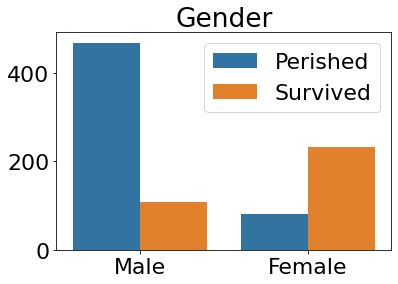

In [16]:
Sex_y = []
Sex_x = ['Male', 'Male', 'Female', 'Female']
Survived = ['Perished', 'Survived', 'Perished', 'Survived']
for i in ['male', 'female']:
    for j in range(2):
        Sex_y.append(training[(training['Sex'] == i) & (training['Survived'] == j)].Name.count())

sns.barplot(Sex_x, Sex_y, hue = Survived).set_title('Gender')
training.groupby(['Sex', 'Survived']).size()

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Embarked  Survived
C         0            75
          1            93
Q         0            47
          1            30
S         0           427
          1           217
dtype: int64

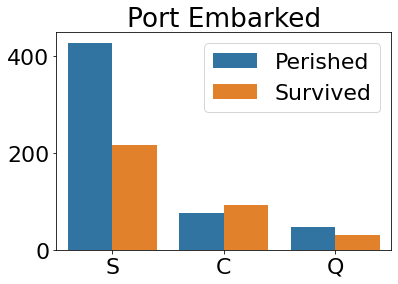

In [17]:
Embarked_y = []
Embarked_x = ['S', 'S', 'C', 'C', 'Q', 'Q']
Survived = ['Perished', 'Survived', 'Perished', 'Survived', 'Perished', 'Survived']
for i in ['S', 'C', 'Q']:
    for j in range(2):
        Embarked_y.append(training[(training['Embarked'] == i) & (training['Survived'] == j)].Name.count())
sns.barplot(Embarked_x, Embarked_y, hue = Survived).set_title('Port Embarked')
training.groupby(['Embarked', 'Survived']).size()

In [18]:
# We note here that 'Ticket' and 'Cabin' have too many unique values, and will have to be looked into seperatedly
training[['Cabin', 'Ticket']].describe()

,Cabin,Ticket
count,204,891
unique,147,681
top,G6,1601
freq,4,7


In [19]:
training.Cabin.unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [20]:
training['cabin_heading'] = training.Cabin.apply(lambda x: str(x)[0])

In [21]:
pd.pivot_table(training, index = 'Survived', columns = 'cabin_heading', values = 'train_test', aggfunc ='count')

cabin_heading,A,B,C,D,E,F,G,T,n
Survived,,,,,,,,,
0,8.0,12.0,24.0,8.0,8.0,5.0,2.0,1.0,481.0
1,7.0,35.0,35.0,25.0,24.0,8.0,2.0,NaN,206.0


In [22]:
# Above, we note that there is only one passenger with cabin heading 'T', and he did not survive.
# Out of curiousity, we check if he is the captain:

print(training.loc[training['cabin_heading'] == 'T'])

     PassengerId  Survived  Pclass                          Name   Sex   Age  \
339          340         0       1  Blackwell, Mr. Stephen Weart  male  45.0   

     SibSp  Parch  Ticket  Fare Cabin Embarked  train_test cabin_heading  
339      0      0  113784  35.5     T        S           1             T  


In [23]:
training.loc[training.Name.str.contains('Capt')]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,train_test,cabin_heading
745,746,0,1,"Crosby, Capt. Edward Gifford",male,70.0,1,1,WE/P 5735,71.0,B22,S,1,B


In [24]:
# training.Ticket.unique()
# Here, we note that the number of unique values in the 'Ticket' column, and upon inspection, we are
# unable to identify similarities and correlations between the different unique values and the survival
# rate of the individuals.

# Hence, we shall drop this column when creating a model for the training data.

# However, we note that this is an area with possibility for further experimentation.

In [25]:
pd.pivot_table(training, index = 'Survived', columns = 'Pclass', values = 'train_test', aggfunc ='count')

Pclass,1,2,3
Survived,,,
0,80,97,372
1,136,87,119


In [26]:
pd.pivot_table(training, index = 'Survived', columns = 'Sex', values = 'train_test', aggfunc ='count')

Sex,female,male
Survived,,
0,81,468
1,233,109


In [27]:
print(training.info())
print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PassengerId    891 non-null    int64  
 1   Survived       891 non-null    int64  
 2   Pclass         891 non-null    int64  
 3   Name           891 non-null    object 
 4   Sex            891 non-null    object 
 5   Age            714 non-null    float64
 6   SibSp          891 non-null    int64  
 7   Parch          891 non-null    int64  
 8   Ticket         891 non-null    object 
 9   Fare           891 non-null    float64
 10  Cabin          204 non-null    object 
 11  Embarked       889 non-null    object 
 12  train_test     891 non-null    int64  
 13  cabin_heading  891 non-null    object 
dtypes: float64(2), int64(6), object(6)
memory usage: 97.6+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 13 columns):
 #   Column       

Data Processing

We note the below:

- Training data has 2 missing values on Embarked (we can drop these rows before training the models)
- Training data has 177 missing values on Age (we can consider encoding them with either the median, or the mean of the ages). We note that 'Age' forms a right-skewed graph, which indicates that the median is smaller than the mean.
- Training data has many missing values on Cabin type. However, upon inspection, we are unable to drop this data, since there seems to be a huge discrepancy between the survival rate of those whos cabin types are known.

- The test set has missing values in the same areas, with the exception of 1 missing value under 'Fare'. However, since this is the test set and we require an interger value on the survivability of this individual, we shall be encoding this with the mean.

In [28]:
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.svm import SVC
from xgboost import XGBClassifier

In [29]:
training = training[training['Embarked'].notna()]
# same as training.dropna(subset = ['Embarked'])

#training.Age = training.Age.fillna(training.Age.mean())
training.Age = training.Age.fillna(training.Age.median())
training.Pclass = training.Pclass.apply(str)

train_dummies = training.drop(columns = ['PassengerId', 'Name', 'Ticket', 'train_test', 'Cabin'])

train_dummies = pd.get_dummies(train_dummies[['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Fare', 'Embarked', 'cabin_heading']])
train_scaled = train_dummies.copy()

train_age_fare = train_dummies[['Age', 'Fare']]
scaler = preprocessing.StandardScaler().fit(train_age_fare.values)
features = scaler.transform(train_age_fare.values)

train_scaled[['Age', 'Fare']] = features
train_scaled.head()
#print(scaled_features)

,Survived,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,...,Embarked_S,cabin_heading_A,cabin_heading_B,cabin_heading_C,cabin_heading_D,cabin_heading_E,cabin_heading_F,cabin_heading_G,cabin_heading_T,cabin_heading_n
0,0,-0.563674,1,0,-0.500240,0,0,1,0,1,...,1,0,0,0,0,0,0,0,0,1
1,1,0.669217,1,0,0.788947,1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
2,1,-0.255451,0,0,-0.486650,0,0,1,1,0,...,1,0,0,0,0,0,0,0,0,1
3,1,0.438050,1,0,0.422861,1,0,0,1,0,...,1,0,0,1,0,0,0,0,0,0
4,0,0.438050,0,0,-0.484133,0,0,1,0,1,...,1,0,0,0,0,0,0,0,0,1


In [30]:
#test.Fare = test.Fare.fillna(training.Fare.mean())
test.Fare = test.Fare.fillna(training.Fare.median())

#test.Age = test.Age.fillna(training.Age.mean())
test.Age = test.Age.fillna(test.Age.median())

test['cabin_heading'] = test.Cabin.apply(lambda x: str(x)[0])
test.Pclass = test.Pclass.apply(str)

test_dummies = test.drop(columns = ['PassengerId', 'Name', 'Ticket', 'train_test', 'Cabin'])

test_dummies = pd.get_dummies(test_dummies[['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Fare', 'Embarked', 'cabin_heading']])
test_scaled = test_dummies.copy()

test_age_fare = test[['Age', 'Fare']]
scaler = preprocessing.StandardScaler().fit(test_age_fare.values)
features = scaler.transform(test_age_fare.values)

test_scaled[['Age', 'Fare']] = features
test_scaled.head()
#print(scaled_features)

,Survived,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,...,Embarked_Q,Embarked_S,cabin_heading_A,cabin_heading_B,cabin_heading_C,cabin_heading_D,cabin_heading_E,cabin_heading_F,cabin_heading_G,cabin_heading_n
0,NaN,0.386231,0,0,-0.497413,0,0,1,0,1,...,1,0,0,0,0,0,0,0,0,1
1,NaN,1.371370,1,0,-0.512278,0,0,1,1,0,...,0,1,0,0,0,0,0,0,0,1
2,NaN,2.553537,0,0,-0.464100,0,1,0,0,1,...,1,0,0,0,0,0,0,0,0,1
3,NaN,-0.204852,0,0,-0.482475,0,0,1,0,1,...,0,1,0,0,0,0,0,0,0,1
4,NaN,-0.598908,1,1,-0.417492,0,0,1,1,0,...,0,1,0,0,0,0,0,0,0,1


In [31]:
X_train = train_scaled.drop(['Survived'], axis = 1)
X_test = test_scaled.drop(['Survived'], axis = 1)
Y_train = train_scaled['Survived']
Y_test = test_scaled['Survived']

In [32]:
#Naive Bayes
gnb = GaussianNB()
cross_val_NB = cross_val_score(gnb, X_train, Y_train, cv=5)
#Logistic Regression
lr = LogisticRegression()
cross_val_LR = cross_val_score(lr, X_train, Y_train, cv=5)
#K Nearest Neighbours
kn = KNeighborsClassifier()
cross_val_KN = cross_val_score(kn, X_train, Y_train, cv=5)
#Random Forest
rf = RandomForestClassifier()
cross_val_RF = cross_val_score(rf, X_train, Y_train, cv=5)
#XG Boost
xg = XGBClassifier(random_state =1)
cross_val_XG = cross_val_score(xg, X_train, Y_train,cv=5)
#Support Vector
sv = SVC(probability = True)
cross_val_SV = cross_val_score(sv, X_train, Y_train,cv=5)

cross_val = [cross_val_NB, cross_val_LR, cross_val_KN, cross_val_RF, cross_val_XG, cross_val_SV]

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/xgboost/data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +
/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier obje

[11:04:11] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:04:11] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +
/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/xgboost/data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +
/opt/conda/lib/python3.7/site-pa

[11:04:11] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:04:11] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:04:11] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/xgboost/data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


In [33]:
print('Naive Bayes: ')
print(cross_val_NB)
print(cross_val_NB.mean())
print('-------------------')
print('Logistic Regression: ')
print(cross_val_LR)
print(cross_val_LR.mean())
print('-------------------')
print('K Nearest Neighbours: ')
print(cross_val_KN)
print(cross_val_KN.mean())
print('-------------------')
print('Random Forest: ')
print(cross_val_RF)
print(cross_val_RF.mean())
print('-------------------')
print('XGBoost: ')
print(cross_val_XG)
print(cross_val_XG.mean())
print('-------------------')
print('Support Vector: ')
print(cross_val_SV)
print(cross_val_SV.mean())
print('-------------------')

Naive Bayes: 
[0.68539326 0.69662921 0.71910112 0.71910112 0.75141243]
0.714327429695931
-------------------
Logistic Regression: 
[0.79775281 0.79213483 0.79775281 0.79213483 0.82485876]
0.8009268075922048
-------------------
K Nearest Neighbours: 
[0.79213483 0.78089888 0.83707865 0.81460674 0.83050847]
0.8110455151399734
-------------------
Random Forest: 
[0.76404494 0.79213483 0.8258427  0.76404494 0.84745763]
0.7987050085697962
-------------------
XGBoost: 
[0.79775281 0.80898876 0.85955056 0.78651685 0.85310734]
0.8211832666793628
-------------------
Support Vector: 
[0.8258427  0.81460674 0.80898876 0.80898876 0.85875706]
0.8234368056878056
-------------------


In [34]:
X_test['cabin_heading_T'] = 0

# We note that the there are no passengers in the test set from cabin with heading T.
# However, our classifier requires the same columns. Hence, we add the column in.

In [35]:
chosen_classifier = SVC(probability = True)
chosen_classifier.fit(X_train, Y_train)
Y_test = chosen_classifier.predict(X_test).astype(int)

In [36]:
#test.columns

result = pd.DataFrame()
result['PassengerId'] = test.PassengerId
result['Survived'] = Y_test
result.to_csv('result.csv', index = False)
result

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
